# Machine Learning Models

## Introduction

This notebook applies supervised machine learning techniques to analyze historical student performance data for academic decision support. Classification models are used to identify at-risk students, while a regression model is applied to predict final academic performance as a continuous value. Multiple models are trained and evaluated to compare predictive performance and interpretability.


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Preparation

The cleaned student performance dataset is loaded, and a categorical risk variable is created based on final grades. This transformation enables classification-based risk prediction rather than raw score estimation.


In [2]:
df = pd.read_csv("../data/student_performance.csv", sep=';')

# recreate risk level (same as EDA)
df['risk_level'] = pd.cut(
    df['G3'],
    bins=[-1, 9, 14, 20],
    labels=['High Risk', 'Medium Risk', 'Low Risk']
)


## Feature Selection

Relevant features are selected based on insights obtained during exploratory data analysis. These features capture academic behavior, prior performance, and attendance, which are known to influence final academic outcomes.


In [3]:
features = ['studytime', 'absences', 'G1', 'G2', 'failures']
X = df[features]
y = df['risk_level']


The selected features represent academic behavior and prior performance, which are strong indicators of final academic outcomes.

## Train–Test Split

The dataset is split into training and testing sets to evaluate model performance on unseen data. Stratified sampling is used to preserve the distribution of risk categories across both sets.


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Feature Scaling

Feature scaling is applied to ensure that numerical attributes are on a comparable scale. This step is particularly important for distance-based and linear models such as Logistic Regression.


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Logistic Regression

Logistic Regression is used as a baseline classification model due to its simplicity and interpretability. The model provides insights into how individual features influence the probability of academic risk.


In [6]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8860759493670886
              precision    recall  f1-score   support

   High Risk       0.88      0.85      0.86        26
    Low Risk       0.88      1.00      0.94        15
 Medium Risk       0.89      0.87      0.88        38

    accuracy                           0.89        79
   macro avg       0.88      0.90      0.89        79
weighted avg       0.89      0.89      0.89        79



### Observation

Logistic Regression demonstrates reasonable classification performance and offers high interpretability, making it suitable as a baseline model for risk prediction.


## Decision Tree Classifier

A Decision Tree classifier is trained to capture non-linear relationships between student attributes and academic risk levels. This model provides intuitive decision rules but may be prone to overfitting.


In [7]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8607594936708861
              precision    recall  f1-score   support

   High Risk       0.77      0.88      0.82        26
    Low Risk       1.00      0.93      0.97        15
 Medium Risk       0.89      0.82      0.85        38

    accuracy                           0.86        79
   macro avg       0.88      0.88      0.88        79
weighted avg       0.87      0.86      0.86        79



### Observation
The Decision Tree model captures complex patterns in the data but shows signs of overfitting when compared to simpler models.


## Random Forest Classifier

Random Forest is an ensemble learning method that combines multiple decision trees to improve generalization and robustness. It reduces overfitting by averaging predictions across trees.


In [8]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8860759493670886
              precision    recall  f1-score   support

   High Risk       0.82      0.88      0.85        26
    Low Risk       1.00      0.93      0.97        15
 Medium Risk       0.89      0.87      0.88        38

    accuracy                           0.89        79
   macro avg       0.90      0.90      0.90        79
weighted avg       0.89      0.89      0.89        79



### Observation
Random Forest achieves improved predictive performance compared to individual models, indicating better generalization on unseen data.


## Model Comparison

The performance of Logistic Regression, Decision Tree, and Random Forest models is compared to evaluate trade-offs between interpretability and predictive accuracy.


### Comparison Summary
- Logistic Regression offers simplicity and interpretability.
- Decision Tree captures complex patterns but may overfit.
- Random Forest provides the best balance between accuracy and robustness.

Based on the comparison, Random Forest is selected as the preferred model for academic risk prediction.


### Note:
> Although Logistic Regression and Random Forest achieve comparable overall accuracy, Random Forest is selected as the preferred model based on its more balanced class-wise performance and reduced critical misclassifications observed in the confusion matrix. Additionally, Random Forest captures non-linear relationships between features and provides feature importance scores, making it suitable for decision support applications.


## Confusion Matrix

To further evaluate the performance of the selected classification model, a confusion matrix is used to analyze class-wise prediction results. Unlike overall accuracy, the confusion matrix provides detailed insight into how well the model distinguishes between different academic risk categories.


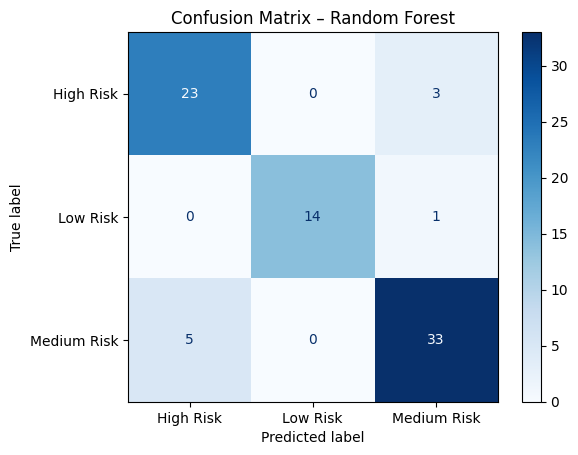

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_rf,
    cmap="Blues"
)
plt.title("Confusion Matrix – Random Forest")
plt.show()


### Confusion Matrix Analysis

The confusion matrix illustrates the distribution of correct and incorrect predictions across high-risk, medium-risk, and low-risk student categories. The results indicate that the Random Forest classifier effectively distinguishes between risk levels, with relatively fewer misclassifications between high-risk and low-risk students, which is crucial for academic decision support.


## Feature Importance Analysis

Feature importance analysis is performed using the Random Forest model to identify the most influential factors contributing to student academic risk.


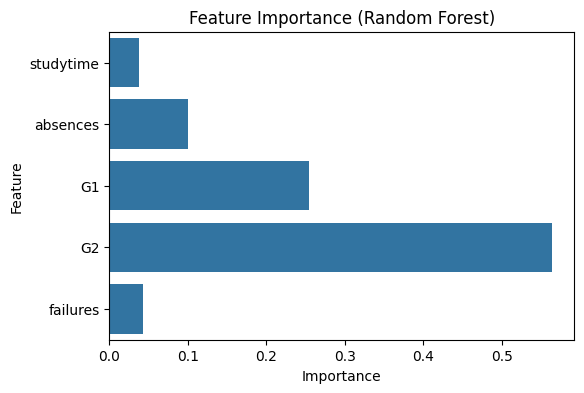

In [10]:
importances = rf.feature_importances_

plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


### Interpretation:
Internal assessment scores (G1 and G2) are the most significant predictors of final academic risk, followed by study behavior and attendance-related attributes.


## Linear Regression for Performance Prediction

In addition to classification-based risk prediction, Linear Regression is applied to predict the final grade (G3) as a continuous variable. This analysis provides an alternative view of student performance and demonstrates regression modeling.


### Explanation
The Linear Regression model is applied with the following approach:

- Input features represent academic behavior and prior performance:
  - Study time
  - Absences
  - Internal assessment scores (G1, G2)
  - Number of past failures
- The target variable is the final grade (G3).
- The dataset is split into training and testing sets to evaluate performance on unseen data.
- The model learns the relationship between the selected features and final grades.
- Model performance is evaluated using:
  - Mean Squared Error (MSE) to measure prediction error
  - R² score to measure the proportion of variance explained by the model

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Feature matrix and target variable
X_reg = df[['studytime', 'absences', 'G1', 'G2', 'failures']]
y_reg = df['G3']

# Train-test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Train Linear Regression model
lr_reg = LinearRegression()
lr_reg.fit(X_train_r, y_train_r)

# Predictions
y_pred_r = lr_reg.predict(X_test_r)

# Evaluation
print("Mean Squared Error (MSE):", mean_squared_error(y_test_r, y_pred_r))
print("R² Score:", r2_score(y_test_r, y_pred_r))


Mean Squared Error (MSE): 4.466503212015606
R² Score: 0.7821754247320555


### Observation
- The regression model captures a strong relationship between internal assessment scores (G1 and G2) and final academic performance.
- The results confirm that prior academic performance is a key predictor of final grades.
- This regression analysis complements the earlier classification-based risk prediction.


### Why Linear Regression is Included
- It demonstrates regression modeling alongside classification.
- It provides a simple and interpretable predictive model.
- It is treated separately from classification models as it addresses a different problem formulation.


### Note:
> Linear Regression is used to predict final grades as continuous values, while classification models are used to categorize students into risk levels. Therefore, the models are evaluated separately.

## Conclusion

Supervised machine learning techniques were successfully applied to analyze student academic data. Classification models effectively identified at-risk students, while Linear Regression provided an alternative perspective by predicting final performance scores. The comparative analysis highlights the trade-offs between interpretability and predictive performance, supporting the use of ensemble-based approaches for decision support.
